In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import requests
import os
import scipy.signal
import scipy.stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import KFold
import pickle
from scipy.stats import kurtosis
from dateutil.relativedelta import relativedelta
import time
from dateutil.tz import gettz
from datetime import timedelta
import calendar
import datetime
# from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
# import xgboost as xgb
%matplotlib inline
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)

step = 10


In [50]:
path = '../../Desktop/windowsshare/stelios_data/plug_data/'
dr = os.listdir(path)
apps = [i.split('.', 1)[0] for i in dr]
appsA = [apps[2],apps[4],apps[5],apps[10],apps[12],apps[13],apps[14]]
appsB = [apps[0],apps[1],apps[3],apps[6]]
appsC = [apps[7],apps[8],apps[9],apps[11]]
appsall = [appsA,appsB,appsC]
print(apps)

['coffee', 'dish', 'entilator', 'freezer', 'fridge', 'heatpumpA', 'heatpumpB', 'heatpumpC', 'iron', 'ironpress', 'oven', 'PC', 'stove', 'vacuum', 'wash']


In [51]:
for i in range(len(dr)):
    globals()['df%s' % i] = pd.read_csv(path+dr[i])
    if np.mod(globals()['df%s' % i].shape[0],step)>0:
        globals()['df%s' % i] = globals()['df%s' % i].iloc[:-np.mod(globals()['df%s' % i].shape[0],step)]
    if 'ts' in globals()['df%s' % i].columns:
        globals()['df%s' % i].drop('ts',axis=1, inplace=True)
    if 'Unnamed: 0' in globals()['df%s' % i].columns:
        globals()['df%s' % i].drop('Unnamed: 0',axis=1, inplace=True)
#     print(globals()['df%s' % i].columns)
    globals()['df%s' % i].columns = ['pwr','apwr','rpwr','label']
    globals()['df%s' % i].drop('apwr',axis=1, inplace=True)
    
        

In [52]:
dfsA = [globals()['df%s' % 2],globals()['df%s' % 4],globals()['df%s' % 5],globals()['df%s' % 10],globals()['df%s' % 12],globals()['df%s' % 13],globals()['df%s' % 14]]

dfsB = [globals()['df%s' % 0],globals()['df%s' % 1],globals()['df%s' % 3],globals()['df%s' % 6]]

dfsC = [globals()['df%s' % 7],globals()['df%s' % 8],globals()['df%s' % 9],globals()['df%s' % 11]]

dfsall = [dfsA,dfsB,dfsC]


In [55]:
cols = ['pwr','rpwr']

for j in range(0,len(dfsall)):
    dfs = dfsall[j]
    apps = appsall[j]
    for i in range(len(dfs)):
    # for i in range(2,3):
        dfcurr = dfs[i].copy()
        dfcurr = pd.concat(sorted(dfs, key=lambda df: df is dfs[i],reverse=True))
        dfcurr['label'].iloc[dfs[i].shape[0]+1:]=0

        df_pr = pd.DataFrame([])
        for col in cols:
            df_pr[col+'_mean'] = dfcurr[col].groupby(np.arange(len(dfcurr))//step).mean()
            df_pr[col+'_std'] = dfcurr[col].groupby(np.arange(len(dfcurr))//step).std()
            df_pr[col+'_min'] = dfcurr[col].groupby(np.arange(len(dfcurr))//step).min()
            df_pr[col+'_max'] = dfcurr[col].groupby(np.arange(len(dfcurr))//step).max()
#             df_pr[col+'_skew'] = dfcurr[col].groupby(np.arange(len(dfcurr))//step).skew()
#             df_pr[col+'_kurt'] = dfcurr[col].groupby(np.arange(len(dfcurr))//step).apply(pd.Series.kurt)
        df_pr['label'] = dfcurr['label'].groupby(np.arange(len(dfcurr))//step).agg(lambda x:x.value_counts().index[0])
        df_pr = df_pr.dropna()

        y = df_pr['label'].values
        X_hd = df_pr.drop('label',axis=1)
        # X = preprocessing.MinMaxScaler().fit_transform(X)

        # split into training and test sets and train the model

        # mdl_hd = KNeighborsClassifier(n_neighbors=5)
        globals()['%s' % apps[i]] = DecisionTreeClassifier(random_state=0,max_depth=50)
    #     X_train, X_test, y_train, y_test = train_test_split(X_hd, y,
    #                                                         stratify=y, 
    #                                                         test_size=0.25)

        globals()['%s' % apps[i]] = globals()['%s' % apps[i]].fit(X_hd,y)

        filename = '../../Desktop/windowsshare/stelios_data/models/%s' % apps[i]+'.sav'
        pickle.dump(globals()['%s' % apps[i]], open(filename, 'wb'))

        y_pred = globals()['%s' % apps[i]].predict(X_hd)
        print('finished',apps[i])
    #     acc = accuracy_score(y, y_pred)
    #     print(acc)

finished entilator


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


finished fridge


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


finished heatpumpA


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


finished oven


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


finished stove


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


finished vacuum


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


finished wash


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


finished coffee


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


finished dish


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


finished freezer


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


finished heatpumpB


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


finished heatpumpC


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


finished iron


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


finished ironpress


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


finished PC


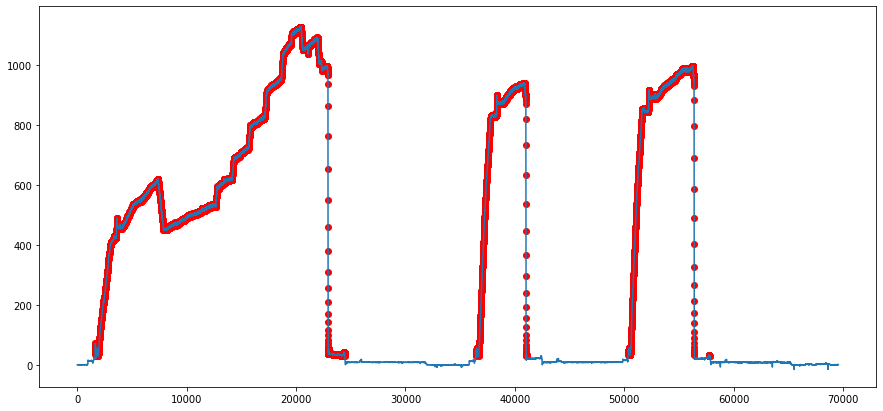

In [30]:
tmp = globals()['df%s' % 7]
fig = plt.figure(figsize=[15,7])
plt.plot(tmp.index,tmp['pwr'])


cl = tmp['label']==1

plt.scatter(tmp.index[cl], tmp['pwr'][cl], color='red') 

In [31]:

tmp[tmp['label']==1].describe()

,pwr,rpwr,label
count,33362.000000,33362.000000,33362.0
mean,678.175755,13.878012,1.0
std,293.366246,78.605445,0.0
min,30.015470,-854.271180,1.0
25%,494.322970,-14.355780,1.0
50%,695.420620,-5.382880,1.0
75%,928.802370,6.138720,1.0
max,1127.931170,380.081220,1.0


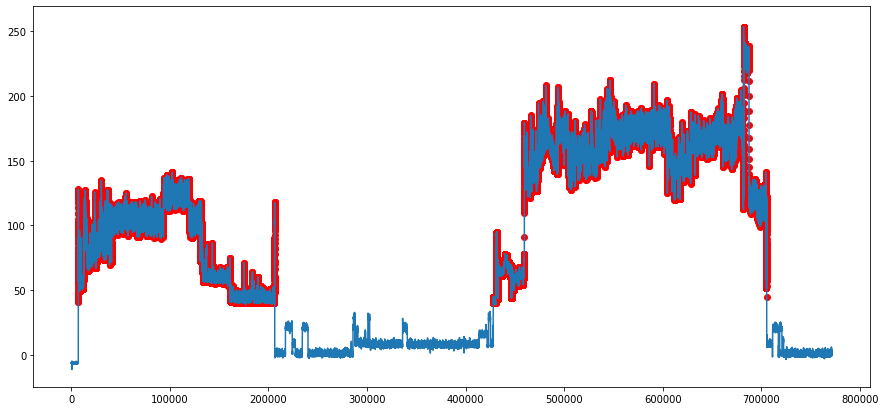

In [32]:
tmp = globals()['df%s' % 11]
fig = plt.figure(figsize=[15,7])
plt.plot(tmp.index,tmp['pwr'])


cl = tmp['label']==1

plt.scatter(tmp.index[cl], tmp['pwr'][cl], color='red') 

In [33]:
tmp[tmp['label']==1].describe()

,pwr,rpwr,label
count,475029.000000,475029.000000,475029.0
mean,122.652148,-54.893676,1.0
std,47.635739,18.726741,0.0
min,40.001560,-122.091715,1.0
25%,78.621960,-72.189315,1.0
50%,125.844860,-50.711615,1.0
75%,165.208260,-41.416615,1.0
max,253.808960,52.597185,1.0
